In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('ggplot')
%matplotlib inline

datadir='/nagyvinyok/adat84/sotejedlik/ribli/expression/data/brca_rnaseq/'
datadir+='RNASeqV2/UNC__IlluminaHiSeq_RNASeqV2/Level_3/'

In [3]:
def get_psi(data):
    data['chr1']=[x.split(',')[0].split(':')[0] for x in data.junction]
    data['chr2']=[x.split(',')[1].split(':')[0] for x in data.junction]

    data['pos1']=[int(x.split(',')[0].split(':')[1]) for x in data.junction]
    data['pos2']=[int(x.split(',')[1].split(':')[1]) for x in data.junction]

    data['strand1']=[x.split(',')[0].split(':')[2] for x in data.junction]
    data['strand2']=[x.split(',')[1].split(':')[2] for x in data.junction]


    data=data[data.chr1==data.chr2]
    data['chr']=data.chr1
    data.drop(['chr1','chr2'],axis=1,inplace=True)

    data=data[data.strand1==data.strand2]
    data['strand']=data.strand1
    data.drop(['strand1','strand2'],axis=1,inplace=True)

    data.drop('junction',axis=1,inplace=True)

    
    
    jctrip=pd.concat([data[:-2],data[1:-1].reset_index(drop=True),data[2:].reset_index(drop=True)],axis=1,ignore_index=True)
    cass=jctrip[ (jctrip[1]==jctrip[6]) & (jctrip[7]==jctrip[12]) ].reset_index(drop=True)


    #mapping control
    #cass_filt=cass[cass[0]+cass[5]+cass[10] > 20]

    n_inc= cass[0]+cass[10]
    n_exc= cass[5]
    psi=0.5* n_inc /(0.5 * n_inc + n_exc)
    
    mapsum=cass[0]+cass[5]+cass[10]
    return mapsum,psi

### Brca

### Load all patients

In [5]:
import gc
import os
from glob import glob

# codes
fs_map=pd.read_csv(
    '/nagyvinyok/adat84/sotejedlik/ribli/expression/data/brca_rnaseq/FILE_SAMPLE_MAP.txt',sep='\t')
fs_map=fs_map.iloc[:-1,:]
fs_dict={}
for i in xrange(len(fs_map)):
    fs_dict[fs_map.iloc[i,0]]=fs_map.iloc[i,1]
    
tum_dict={}
for i in xrange(len(fs_map)):
    if ( fs_map.iloc[i,1].split('-')[3][0]=='0'):
        tum_dict[fs_map.iloc[i,0]]='tumor'
    else:
        tum_dict[fs_map.iloc[i,0]]='normal'
        
#load data      
df_list,tum_list,norm_list=[],[],[]
gene_df=pd.DataFrame()
i=0
for filename in glob(datadir+'*junction_quantification.txt'):
    fname=os.path.basename(filename)

    if tum_dict[fname]=='tumor':
        'nothing'
        #tum_list.append(tmp_df[['raw_counts']])
    else:
        tmp_df=pd.read_csv(filename, sep='\t',header=0)
        gene_df=tmp_df.junction
        norm_list.append(tmp_df[['raw_counts']])
        
    print '.',
    i+=1
    if i%100==0:
        print i,
    gc.collect()

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 100 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 200 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 300 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 400 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

In [7]:
brca_data_matrix=pd.concat(norm_list,axis=1)
brca_data=pd.concat([gene_df]+[brca_data_matrix.mean(axis=1)],axis=1)
brca_sum,brca_psi=get_psi(brca_data)

### Prad 

In [10]:
datadir='/nagyvinyok/adat84/sotejedlik/ribli/expression/data/prad_rnaseq/'
datadir+='RNASeqV2/UNC__IlluminaHiSeq_RNASeqV2/Level_3/'

fs_map=pd.read_csv(
    '/nagyvinyok/adat84/sotejedlik/ribli/expression/data/prad_rnaseq/FILE_SAMPLE_MAP.txt',sep='\t')
fs_map=fs_map.iloc[:-1,:]
fs_dict={}
for i in xrange(len(fs_map)):
    fs_dict[fs_map.iloc[i,0]]=fs_map.iloc[i,1]
    
    
tum_dict={}
for i in xrange(len(fs_map)):
    if ( fs_map.iloc[i,1].split('-')[3][0]=='0'):
        tum_dict[fs_map.iloc[i,0]]='tumor'
    else:
        tum_dict[fs_map.iloc[i,0]]='normal'
        
        
df_list,tum_list,norm_list=[],[],[]
gene_df=pd.DataFrame()
i=0
for filename in glob(datadir+'*junction_quantification.txt'):
    fname=os.path.basename(filename)

    if tum_dict[fname]=='tumor':
        'nothing'
        #tum_list.append(tmp_df[['raw_counts']])
    else:
        tmp_df=pd.read_csv(filename, sep='\t',header=0)
        gene_df=tmp_df.junction
        norm_list.append(tmp_df[['raw_counts']])
        
    print '.',
    i+=1
    if i%100==0:
        print i,
    gc.collect()

 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 100 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 200 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 300 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 400 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

In [11]:
prad_data_matrix=pd.concat(norm_list,axis=1)
prad_data=pd.concat([gene_df]+[prad_data_matrix.mean(axis=1)],axis=1)
prad_sum,prad_psi=get_psi(prad_data)

(-0.05, 1.05)

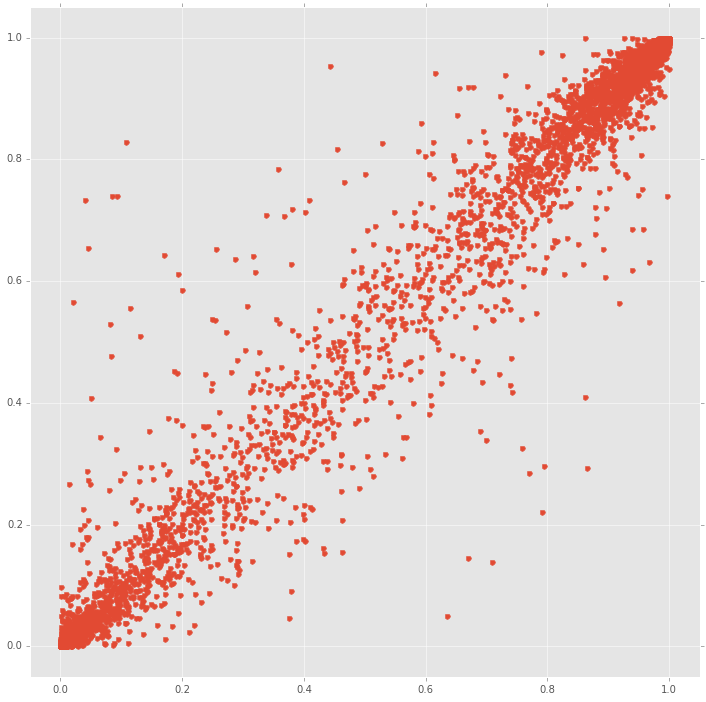

In [15]:
lim=10
idx = (brca_sum.values > lim) & (prad_sum.values>lim)

plt.figure(figsize=(12,12))
plt.plot(brca_psi[idx],prad_psi[idx],'.',ms=10)
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)

(-0.6, 0.6)

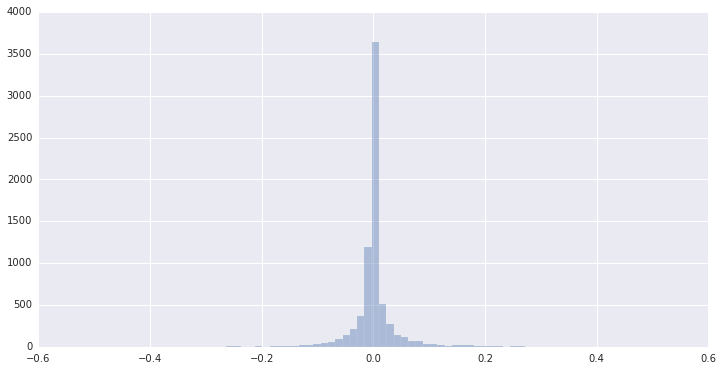

In [27]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.distplot(brca_psi[idx]-prad_psi[idx],kde=False,bins=100)
plt.xlim(-0.6,0.6)

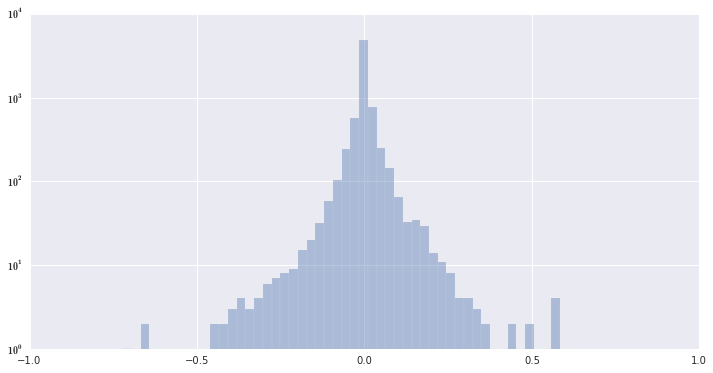

In [26]:
plt.figure(figsize=(12,6))
sns.distplot(brca_psi[idx]-prad_psi[idx],kde=False,bins=50)
plt.xlim(-1,1)
plt.yscale('log')

In [28]:
limit=0.15
np.sum(np.abs(brca_psi[idx]-prad_psi[idx])>limit)

194